# Proyek Machine Learning - Model Recommender System Berbasis Obat 
# Data Diri

- Nama : Said Thaufik Rizaldi
- Jenis Kelamin : Laki-Laki
- Email : saidthaufik24@gmail.com
- Kota Domisili : Bogor
- Jalur : Educators 2024

# Import Library

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import re

# Import Data

In [2]:
file_a = 'drugLibTrain_raw.tsv'
file_b = 'drugLibTest_raw.tsv'
df_a = pd.read_csv(file_a, sep='\t')
df_b = pd.read_csv(file_b, sep='\t')

In [3]:
df_a

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


In [4]:
df_b

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...
...,...,...,...,...,...,...,...,...,...
1031,690,accutane,7,Considerably Effective,Severe Side Effects,acne vulgaris,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
1032,1071,proair-hfa,10,Highly Effective,No Side Effects,asthma,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
1033,681,accutane,8,Considerably Effective,Moderate Side Effects,serve acne,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
1034,2709,divigel,10,Highly Effective,No Side Effects,menopause,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...


Data sudah berhasil di _import_ menjadi variabel `df_a` dan `df_b`

# Data Understanding

Dataset yang digunakan untuk pembuatan model sistem rekomendasi ini adalah dataset "Drug Review Dataset (Drugs.com)" yang tersedia di situs [UCI Machine Learning Repository](https://doi.org/10.24432/C55G6J). Dataset ini berisi ulasan pasien terkait obat-obatan tertentu beserta kondisi medis yang relevan.

Terdapat dua file utama yang digunakan:
1. **`drugLibTrain_raw.tsv`** atau variabel `df_a` – Berisi 3107 baris dan 9 kolom
2. **`drugLibTest_raw.tsv`** atau variabel `df_b` – Berisi 1036 baris dan 9 kolom.

Dataset ini digunakan untuk membangun sistem rekomendasi berbasis **Content-Based Filtering**

Berikut adalah informasi mengenai atribut-atribut yang terdapat pada dataset:

**Atribut pada Dataset:**
- **`Unnamed:0`** / **ReviewID** : Data Unik Review dari pengguna
- **`urlDrugName`**: Nama obat yang diulas.
- **`rating`**: Skor penilaian yang diberikan pengguna (skala 1–10).
- **`effectiveness`**: Efektivitas obat berdasarkan pengalaman pengguna.
- **`sideEffects`**: Efek samping yang dirasakan pengguna.
- **`condition`**: Kondisi medis yang diatasi oleh obat.
- **`benefitsReview`**: Ulasan mengenai manfaat obat dari pengguna.
- **`sideEffectsReview`**: Ulasan mengenai efek samping obat dari pengguna.
- **`commentsReview`**: Komentar tambahan mengenai pengalaman pengguna dengan obat.

**Dataset tersebut dapat diunduh di [https://doi.org/10.24432/C55G6J](https://doi.org/10.24432/C55G6J)**

## Exploratory Data Analysis
**Exploratory Data Analysis (EDA)** adalah proses eksplorasi dan analisis awal terhadap data untuk memahami struktur, pola, dan karakteristiknya sebelum dilakukan pemodelan lebih lanjut. EDA bertujuan untuk mengidentifikasi distribusi data, mendeteksi nilai yang hilang atau pencilan, serta menganalisis hubungan antar variabel.

### Dataset `df_a`

In [5]:
# Menampilan jumlah baris dan kolom yang ada pada dataset
df_a.shape

(3107, 9)

Berdasarkan _output_ diatas, `df_a` memiliki:
- 3107 baris data
- 9 kolom data

Untuk selanjutnya kita akan melihat lebih jauh setiap kolom, cek data kosong dan tipe datanya

In [6]:
# Menampilkan kolom, tipe data, cek data kosong dari setiap kolom yang ada
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3107 non-null   object
 7   sideEffectsReview  3105 non-null   object
 8   commentsReview     3099 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


Berdasarkan _output_ diatas, `df_a` memiliki 9 kolom pada dataset ini diantaranya memiliki tipe datanya masing-masing, yaitu:
- `Unnamed:0` : `int64`
- `urlDrugName` : `object`
- `rating` : `int64`
- `effectiveness` : `object`
- `sideEffects` : `object`
- `condition` : `object`
- `benefitsReview` : `object`
- `sideEffectsReview` : `object`
- `commentsReview` : `object`

In [7]:
# Menampilkan deskripsi statistik kolom rating
df_a['rating'].describe()

count    3107.000000
mean        7.006115
std         2.937582
min         1.000000
25%         5.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: rating, dtype: float64

Fungsi di atas menyediakan informasi statistik deskriptif untuk kolom `review` pada variabel `df_a`, meliputi:

- **`count`**: Jumlah total data dalam kolom.
- **`mean`**: Nilai rata-rata dari data dalam kolom.
- **`std`**: Standar deviasi dari data dalam kolom.
- **`min`**: Nilai terkecil dalam kolom.
- **`25%`**: Kuartil pertama (Q1), yaitu nilai yang memisahkan 25% data terendah.
- **`50%`**: Kuartil kedua (Q2) atau median, yaitu nilai tengah dari data.
- **`75%`**: Kuartil ketiga (Q3), yaitu nilai yang memisahkan 25% data tertinggi.
- **`max`**: Nilai terbesar dalam kolom.

In [8]:
# Menampilkann total unique value di kolom Unnamed:0 / ReviewID
print(df_a['Unnamed: 0'].nunique())

3107


Berdasarkan output diatas nilai fungsi `nunique()` dari kolom `Unnamed:0` atau `ReviewID` adalah sebanyak **3107 data unik**.

In [9]:
# Menampilkann total unique value di kolom urlDrugName
print(df_a['urlDrugName'].nunique())

502


Berdasarkan _output_ diatas nilai `nunique()` dari kolom `urlDrugName` adalah sebanyak **502 data unik** terkait dengan obat. 

In [10]:
# Menampilkann total unique value di kolom effectiveness
print(df_a['effectiveness'].nunique())

5


Berdasarkan _output_ diatas nilai `nunique()` dari kolom `effectiveness` adalah sebanyak 5 data unik.

In [11]:
# Menampilkann total unique value di kolom sideEffects
print(df_a['sideEffects'].nunique())

5


Berdasarkan output diatas nilai `nunique()` dari kolom `sideEffects` adalah sebanyak 5 data unik. Ini sudah merepresentasikan `sideEffects` yang digunakan pada dataset ini dengan skala dengan 5 level.

In [12]:
# Menampilkann total unique value di kolom condition
print(df_a['condition'].nunique())

1426


Berdasarkan _output_ diatas nilai `nunique()` dari kolom `condition` adalah sebanyak 1426 data unik.

In [13]:
# Menampilkann total unique value di kolom benefitsReview
print(df_a['benefitsReview'].nunique())

3032


Berdasarkan _output_ diatas nilai `nunique()` dari kolom `benefitsReview` adalah sebanyak 3032 data unik atau hampir keseluruhan data merupakan data unik. 

In [14]:
df_a['benefitsReview']

0       slowed the progression of left ventricular dys...
1       Although this type of birth control has more c...
2       I was used to having cramps so badly that they...
3       The acid reflux went away for a few months aft...
4       I think that the Lyrica was starting to help w...
                              ...                        
3102    Increased focus, attention, productivity. Bett...
3103      Emotions were somewhat blunted. Less moodiness.
3104                                                  ---
3105                 Controlled complex partial seizures.
3106    The drug Micardis did seem to alleviate my hig...
Name: benefitsReview, Length: 3107, dtype: object

Berdasarkan _output_ diatas bahwa karakteristik data pada kolom `benefitsReview` adalah berbentuk _Review_ atau _Natural Language_

In [15]:
# Menampilkann total unique value di kolom sideEffectsReview
print(df_a['sideEffectsReview'].nunique())

2814


Berdasarkan output diatas nilai nunique() dari kolom sideEffectsReview adalah sebanyak 2814 data unik atau hampir keseluruhan data merupakan data unik.

In [16]:
df_a['sideEffectsReview']

0       cough, hypotension , proteinuria, impotence , ...
1       Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...
2              Heavier bleeding and clotting than normal.
3       Constipation, dry mouth and some mild dizzines...
4       I felt extremely drugged and dopey.  Could not...
                              ...                        
3102    Restless legs at night, insomnia, headache (so...
3103    Weight gain, extreme tiredness during the day,...
3104    Constant issues with the patch not staying on....
3105                           Dizziness, fatigue, nausea
3106    I find when I am taking Micardis that I tend t...
Name: sideEffectsReview, Length: 3107, dtype: object

Berdasarkan _output_ diatas bahwa karakteristik data pada kolom `sideEffectsReview` adalah berbentuk _Review_ atau _Natural Language_

In [17]:
# Menampilkann total unique value di kolom commentsReview
print(df_a['commentsReview'].nunique())

3047


Berdasarkan output diatas nilai `nunique()` dari kolom `commentsReview` adalah sebanyak 3047 data unik atau hampir keseluruhan data merupakan data unik.

In [18]:
df_a['commentsReview']

0       monitor blood pressure , weight and asses for ...
1       I Hate This Birth Control, I Would Not Suggest...
2       I took 2 pills at the onset of my menstrual cr...
3       I was given Prilosec prescription at a dose of...
4                                               See above
                              ...                        
3102    I took adderall once as a child, and it made m...
3103    I was on Zoloft for about 2 years total. I am ...
3104                                                  ---
3105    Started at 2 doses of 300 mg a day and worked ...
3106             I take Micardis in pill form once daily.
Name: commentsReview, Length: 3107, dtype: object

Berdasarkan _output_ diatas bahwa karakteristik data pada kolom `commentsReview` adalah berbentuk _Review_ atau _Natural Language_

In [19]:
# Pengecekan data duplikat pada dataframe `df`
df_a.duplicated().sum()

0

Berdasarkan _output_ diatas bahwa tidak terdapat data yang duplikat terhadap dataset `df_a`

**Data Visualization `df_a`**

**Data Visualization** adalah proses penyajian data dalam bentuk grafik atau diagram untuk mempermudah interpretasi dan analisis informasi. Visualisasi data memungkinkan kita untuk mengidentifikasi pola, tren, dan hubungan antar variabel dengan lebih intuitif dibandingkan hanya melihat tabel angka mentah. 

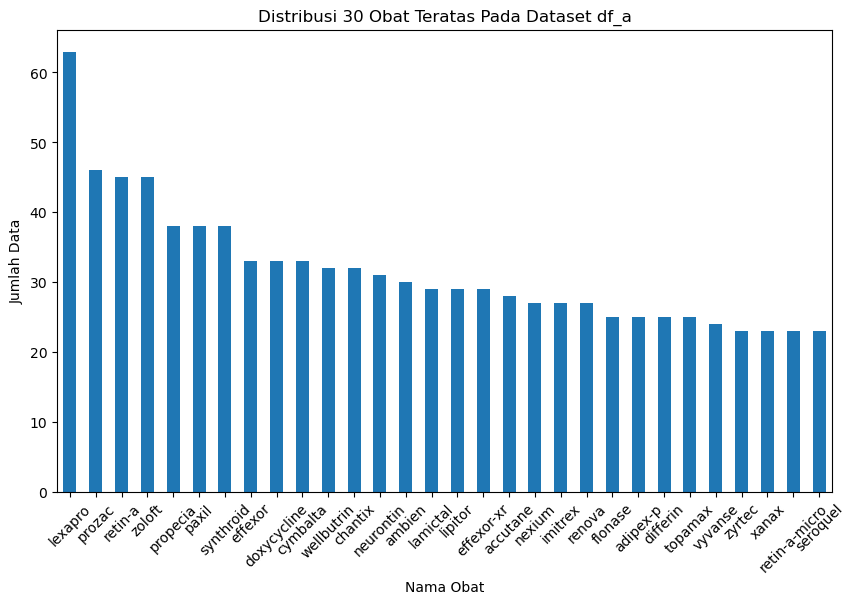

In [20]:
# Melihat Distribusi 30 `urlDrugName` Teratas
df_a['urlDrugName'].value_counts().head(30).plot(kind='bar', figsize=(10, 6))
plt.title('Distribusi 30 Obat Teratas Pada Dataset df_a')
plt.xlabel('Nama Obat')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.show()

Berdasarkan grafik diatas bahwa persebaran data pada `urlDrugName` cukup merata sehingga tetap dipertahankan untuk analisis berikutnya

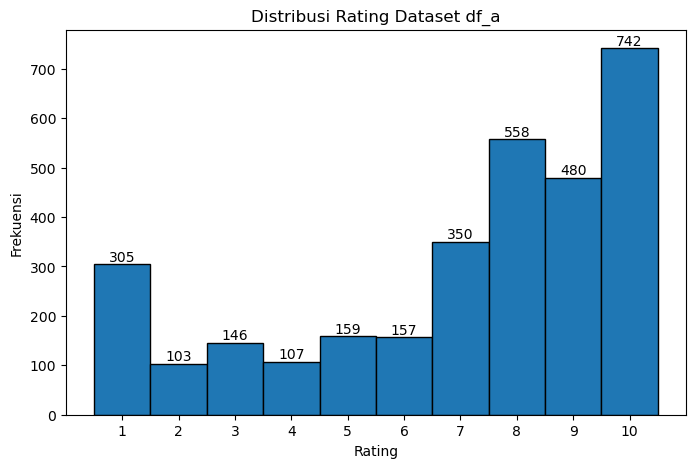

In [21]:
# Melihat Distribusi `rating`
plt.figure(figsize=(8, 5))
counts, bins, patches = plt.hist(df_a['rating'], bins=range(1, 12), edgecolor='black', align='left')
for i in range(len(patches)):
    plt.text(patches[i].get_x() + 0.5, patches[i].get_height(),  
             str(int(patches[i].get_height())),                 
             ha='center', va='bottom')                          

plt.title('Distribusi Rating Dataset df_a')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.xticks(range(1, 11)) 
plt.grid(False)
plt.show()

Berdasarkan grafik diatas bahwa distribusi `rating` yang **terbesar adalah 10 dengan data 742**, sedangkan `rating` yang **terkecil adalah 2 dengan data 103**

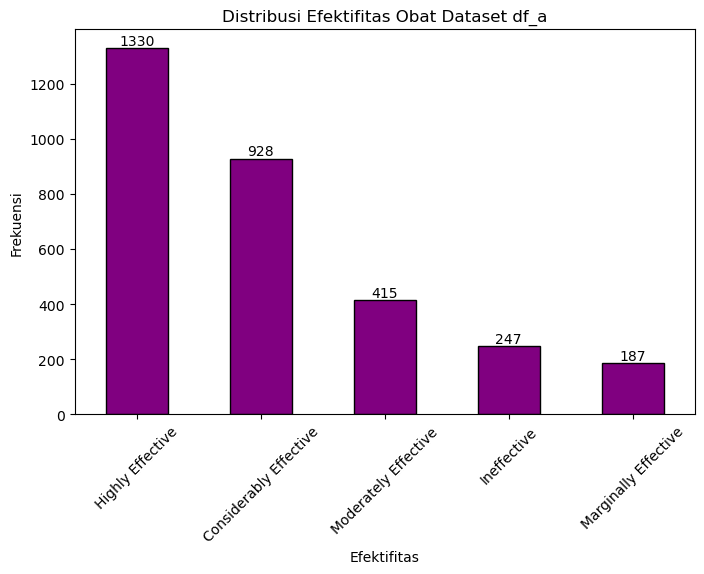

In [22]:
# Melihat Distribusi `effectiveness`
counts = df_a['effectiveness'].value_counts()
plt.figure(figsize=(8, 5))
counts.plot(kind='bar', color='purple', edgecolor='black')

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Distribusi Efektifitas Obat Dataset df_a')
plt.xlabel('Efektifitas')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

Berdasarkan grafik diatas bahwa distribusi `effectiveness` yang **terbesar adalah Highly Effective dengan data 1330**, sedangkan `effectiveness` yang **terkecil adalah Marginally Effective dengan 187 data**

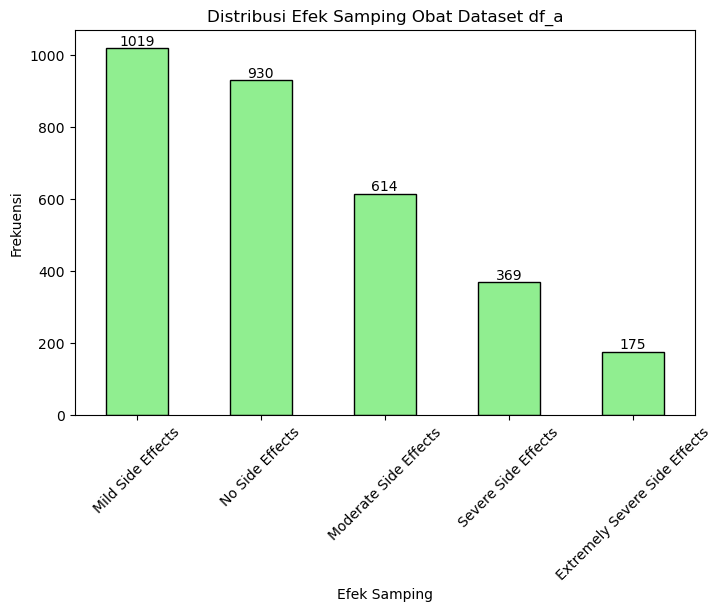

In [23]:
# Melihat Distribusi `sideEffects`
counts = df_a['sideEffects'].value_counts()
plt.figure(figsize=(8, 5))
counts.plot(kind='bar', color='lightgreen', edgecolor='black')

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Distribusi Efek Samping Obat Dataset df_a')
plt.xlabel('Efek Samping')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

Berdasarkan grafik diatas bahwa distribusi `sideEffects` yang **terbesar adalah Mid Side Effects dengan data 1019**, sedangkan `sideEffects` yang **terkecil adalah Extremely Severe Side Effects dengan 175 data**

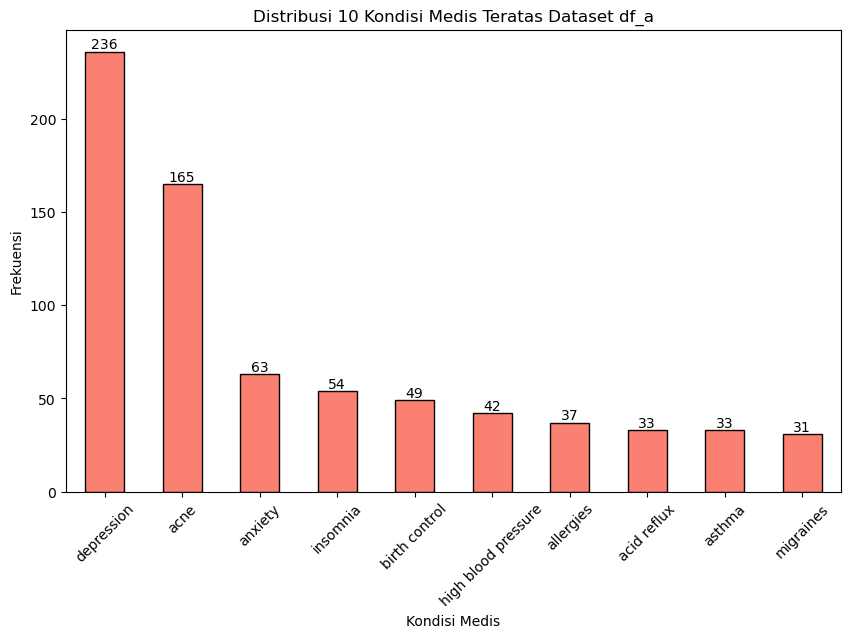

In [24]:
# Melihat Distribusi `condition`
counts = df_a['condition'].value_counts().head(10)
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='salmon', edgecolor='black')

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Distribusi 10 Kondisi Medis Teratas Dataset df_a')
plt.xlabel('Kondisi Medis')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

Berikut adalah grafik 10 teratas distribusi `condition` terlihat bahwa **despression** dan **acne** menjadi yang paling mencolok dari distribusi lainnya

### Dataset `df_b`

In [25]:
# Menampilan jumlah baris dan kolom yang ada pada dataset
df_b.shape

(1036, 9)

Berdasarkan _output_ diatas, `df_b` memiliki:
- 1036 baris data
- 9 kolom data

Untuk selanjutnya kita akan melihat lebih jauh setiap kolom, cek data kosong dan tipe datanya

In [26]:
# Menampilkan kolom, tipe data, cek data kosong dari setiap kolom yang ada
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1036 non-null   int64 
 1   urlDrugName        1036 non-null   object
 2   rating             1036 non-null   int64 
 3   effectiveness      1036 non-null   object
 4   sideEffects        1036 non-null   object
 5   condition          1036 non-null   object
 6   benefitsReview     1036 non-null   object
 7   sideEffectsReview  1036 non-null   object
 8   commentsReview     1036 non-null   object
dtypes: int64(2), object(7)
memory usage: 73.0+ KB


Berdasarkan _output_ diatas, `df_b` memiliki 9 kolom pada dataset ini diantaranya memiliki tipe datanya masing-masing, yaitu:
- `Unnamed:0` : `int64`
- `urlDrugName` : `object`
- `rating` : `int64`
- `effectiveness` : `object`
- `sideEffects` : `object`
- `condition` : `object`
- `benefitsReview` : `object`
- `sideEffectsReview` : `object`
- `commentsReview` : `object`

In [27]:
# Menampilkan deskripsi statistik kolom rating
df_b['rating'].describe()

count    1036.000000
mean        6.767375
std         2.976711
min         1.000000
25%         5.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: rating, dtype: float64

Fungsi di atas menyediakan informasi statistik deskriptif untuk kolom `review` pada variabel `df_b`, meliputi:

- **`count`**: Jumlah total data dalam kolom.
- **`mean`**: Nilai rata-rata dari data dalam kolom.
- **`std`**: Standar deviasi dari data dalam kolom.
- **`min`**: Nilai terkecil dalam kolom.
- **`25%`**: Kuartil pertama (Q1), yaitu nilai yang memisahkan 25% data terendah.
- **`50%`**: Kuartil kedua (Q2) atau median, yaitu nilai tengah dari data.
- **`75%`**: Kuartil ketiga (Q3), yaitu nilai yang memisahkan 25% data tertinggi.
- **`max`**: Nilai terbesar dalam kolom.

In [28]:
# Menampilkann total unique value di kolom Unnamed:0 / ReviewID
print(df_b['Unnamed: 0'].nunique())

1036


Berdasarkan output diatas nilai fungsi `nunique()` dari kolom `Unnamed:0` atau `ReviewID` adalah sebanyak **1036 data unik**.

In [29]:
# Menampilkann total unique value di kolom urlDrugName
print(df_b['urlDrugName'].nunique())

314


Berdasarkan _output_ diatas nilai `nunique()` dari kolom `urlDrugName` adalah sebanyak **314 data unik** terkait dengan obat. 

In [30]:
# Menampilkann total unique value di kolom effectiveness
print(df_b['effectiveness'].nunique())

5


Berdasarkan _output_ diatas nilai `nunique()` dari kolom `effectiveness` adalah sebanyak 5 data unik.

In [31]:
# Menampilkann total unique value di kolom sideEffects
print(df_b['sideEffects'].nunique())

5


Berdasarkan output diatas nilai `nunique()` dari kolom `sideEffects` adalah sebanyak 5 data unik. Ini sudah merepresentasikan `sideEffects` yang digunakan pada dataset ini dengan skala dengan 5 level.

In [32]:
# Menampilkann total unique value di kolom condition
print(df_b['condition'].nunique())

566


Berdasarkan _output_ diatas nilai `nunique()` dari kolom `condition` adalah sebanyak 1426 data unik.

In [33]:
# Menampilkann total unique value di kolom benefitsReview
print(df_b['benefitsReview'].nunique())

1023


Berdasarkan _output_ diatas nilai `nunique()` dari kolom `benefitsReview` adalah sebanyak 3032 data unik atau hampir keseluruhan data merupakan data unik. 

In [34]:
df_b['benefitsReview']

0       The antibiotic may have destroyed bacteria cau...
1       Lamictal stabilized my serious mood swings. On...
2       Initial benefits were comparable to the brand ...
3       It controlls my mood swings. It helps me think...
4       Within one week of treatment superficial acne ...
                              ...                        
1031    Detoxing effect by pushing out the system thro...
1032    The albuterol relieved the constriction, irrit...
1033                      Serve Acne has turned to middle
1034    My overall mood, sense of well being, energy l...
1035    Up until 2 years ago, it worked really well on...
Name: benefitsReview, Length: 1036, dtype: object

Berdasarkan _output_ diatas bahwa karakteristik data pada kolom `benefitsReview` adalah berbentuk _Review_ atau _Natural Language_

In [35]:
# Menampilkann total unique value di kolom sideEffectsReview
print(df_b['sideEffectsReview'].nunique())

968


Berdasarkan output diatas nilai nunique() dari kolom sideEffectsReview adalah sebanyak 2814 data unik atau hampir keseluruhan data merupakan data unik.

In [36]:
df_b['sideEffectsReview']

0                           Some back pain, some nauseau.
1       Drowsiness, a bit of mental numbness. If you t...
2       Depakene has a very thin coating, which caused...
3                 I didnt really notice any side effects.
4       Side effects included moderate to severe dry s...
                              ...                        
1031    Hairloss, extreme dry skin, itchiness, raises ...
1032                  I have experienced no side effects.
1033      Painfull muscles, problems with seeing at night
1034    No side effects of any kind were noted or appa...
1035    Have stopped using it and have also learned th...
Name: sideEffectsReview, Length: 1036, dtype: object

Berdasarkan _output_ diatas bahwa karakteristik data pada kolom `sideEffectsReview` adalah berbentuk _Review_ atau _Natural Language_

In [37]:
# Menampilkann total unique value di kolom commentsReview
print(df_b['commentsReview'].nunique())

1030


Berdasarkan output diatas nilai `nunique()` dari kolom `commentsReview` adalah sebanyak 3047 data unik atau hampir keseluruhan data merupakan data unik.

In [38]:
df_b['commentsReview']

0       Took the antibiotics for 14 days. Sinus infect...
1       Severe mood swings between hypomania and depre...
2       Depakote was prescribed to me by a Kaiser psyc...
3       This drug may not be for everyone but its wond...
4       Drug was taken in gelatin tablet at 0.5 mg per...
                              ...                        
1031    Treatment period is 3 months/12 weeks. Dosage ...
1032    I use the albuterol as needed because of aller...
1033    This drug is highly teratogenic ,females must ...
1034    Divigel is a topically applied Bio-Identical H...
1035                 Stopped using it for the time being.
Name: commentsReview, Length: 1036, dtype: object

Berdasarkan _output_ diatas bahwa karakteristik data pada kolom `commentsReview` adalah berbentuk _Review_ atau _Natural Language_

In [39]:
# Pengecekan data duplikat pada dataframe `df`
df_b.duplicated().sum()

0

Berdasarkan _output_ diatas bahwa tidak terdapat data yang duplikat terhadap dataset `df_b`

**Data Visualization `df_b`**

**Data Visualization** adalah proses penyajian data dalam bentuk grafik atau diagram untuk mempermudah interpretasi dan analisis informasi. Visualisasi data memungkinkan kita untuk mengidentifikasi pola, tren, dan hubungan antar variabel dengan lebih intuitif dibandingkan hanya melihat tabel angka mentah. 

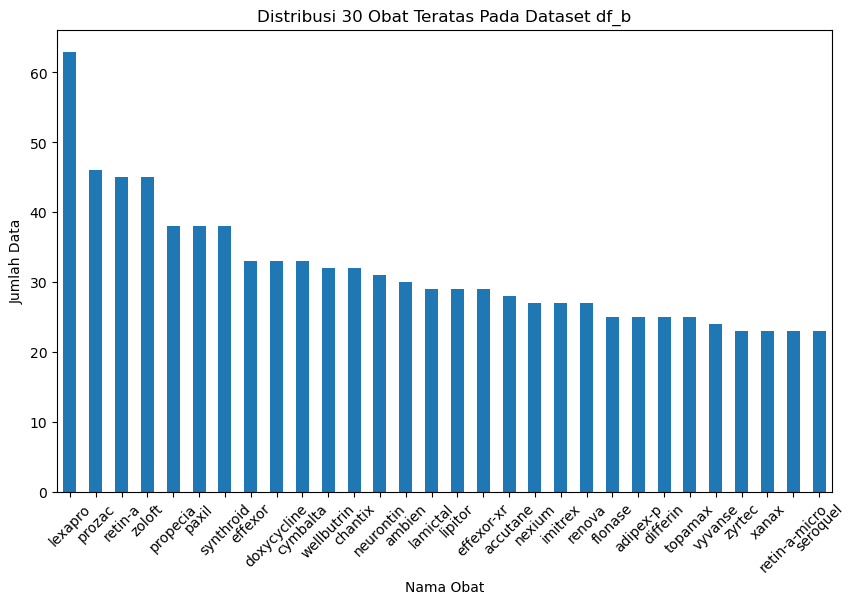

In [40]:
# Melihat Distribusi 30 `urlDrugName` Teratas
df_a['urlDrugName'].value_counts().head(30).plot(kind='bar', figsize=(10, 6))
plt.title('Distribusi 30 Obat Teratas Pada Dataset df_b')
plt.xlabel('Nama Obat')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.show()

Berdasarkan grafik diatas bahwa persebaran data pada `urlDrugName` cukup merata sehingga tetap dipertahankan untuk analisis berikutnya

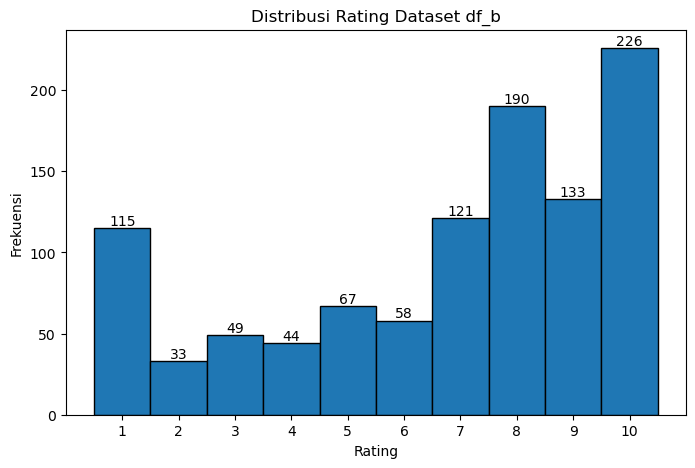

In [41]:
# Melihat Distribusi `rating`
plt.figure(figsize=(8, 5))
counts, bins, patches = plt.hist(df_b['rating'], bins=range(1, 12), edgecolor='black', align='left')
for i in range(len(patches)):
    plt.text(patches[i].get_x() + 0.5, patches[i].get_height(),  
             str(int(patches[i].get_height())),                 
             ha='center', va='bottom')                          

plt.title('Distribusi Rating Dataset df_b')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.xticks(range(1, 11)) 
plt.grid(False)
plt.show()

Berdasarkan grafik diatas bahwa distribusi `rating` yang **terbesar adalah 10 dengan data 226**, sedangkan `rating` yang **terkecil adalah 2 dengan data 33**

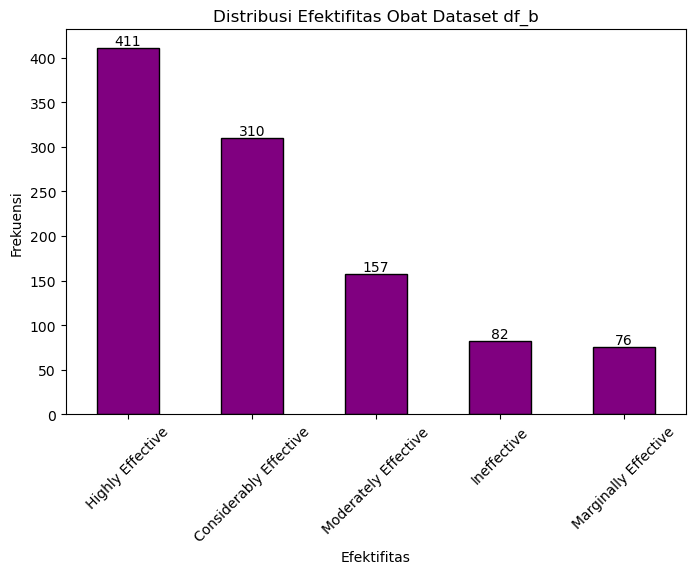

In [42]:
# Melihat Distribusi `effectiveness`
counts = df_b['effectiveness'].value_counts()
plt.figure(figsize=(8, 5))
counts.plot(kind='bar', color='purple', edgecolor='black')

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Distribusi Efektifitas Obat Dataset df_b')
plt.xlabel('Efektifitas')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

Berdasarkan grafik diatas bahwa distribusi `effectiveness` yang **terbesar adalah Highly Effective dengan data 411**, sedangkan `effectiveness` yang **terkecil adalah Marginally Effective dengan 76 data**

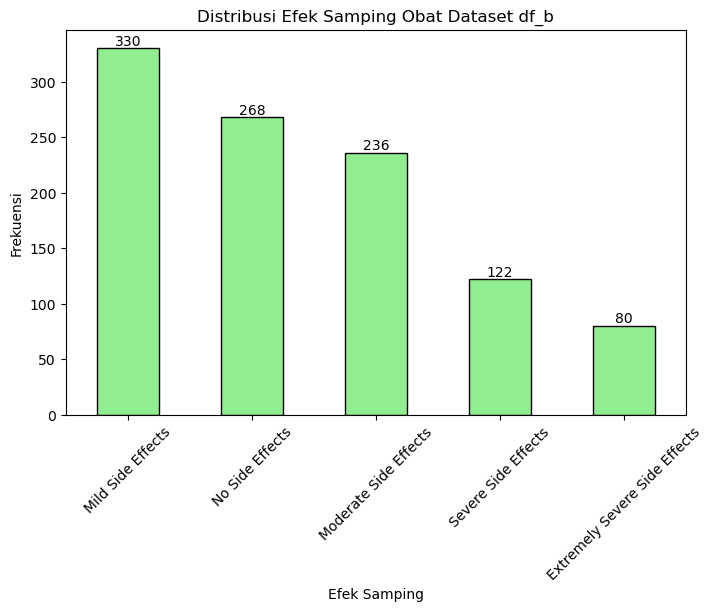

In [43]:
# Melihat Distribusi `sideEffects`
counts = df_b['sideEffects'].value_counts()
plt.figure(figsize=(8, 5))
counts.plot(kind='bar', color='lightgreen', edgecolor='black')

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Distribusi Efek Samping Obat Dataset df_b')
plt.xlabel('Efek Samping')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

Berdasarkan grafik diatas bahwa distribusi `sideEffects` yang **terbesar adalah Mid Side Effects dengan data 330**, sedangkan `sideEffects` yang **terkecil adalah Extremely Severe Side Effects dengan 80 data**

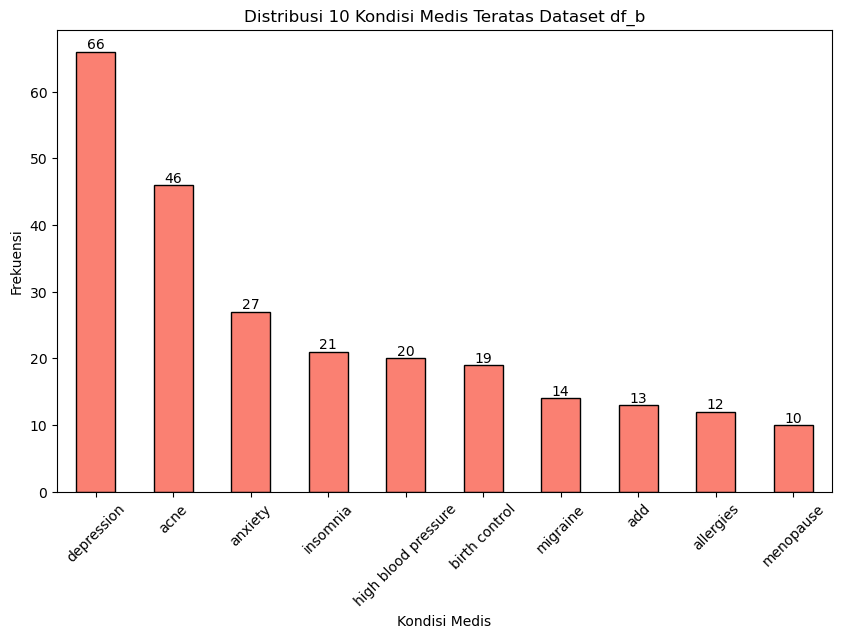

In [44]:
# Melihat Distribusi `condition`
counts = df_b['condition'].value_counts().head(10)
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='salmon', edgecolor='black')

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Distribusi 10 Kondisi Medis Teratas Dataset df_b')
plt.xlabel('Kondisi Medis')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

Berikut adalah grafik 10 teratas distribusi `condition` terlihat bahwa **despression** dan **acne** menjadi yang paling mencolok dari distribusi lainnya

# Data Preparation

## Penggabungan Dataset

Pada proses ini dilakukan penggabungan dua dataset utama untuk memperkaya informasi dan memudahkan proses analisis data lebih lanjut. Adapun data yang digabungkan adalah `drugLibTrain_raw.tsv` atau variabel `df_a` dengan 3107 baris dan 9 kolom dan `drugLibTest_raw.tsv`atau variabel `df_b` dengan 1036 baris dan 9 kolom

**Alasan:**
Dataset ini dilakukan penggabungan karena memiliki karakteristik yang sama dan kemudahan dalam pengolahan. Selanjutnya, data akan digabungkan menggunakan fungsi `concat()` menjadi variabel `df` agar lebih kaya untuk analisis lanjutan.

In [45]:
df = pd.concat([df_a, df_b])

In [46]:
df.shape

(4143, 9)

Berhasil menggabungkan data `df_a` dan `df_b` menjadi variabel `df` dengan menggunakan fungsi `concat()` dengan jumlah baris adalah 4143 dan jumlah kolom adalah 9 

## **Handling Data Duplikat**  
Pada proses ini, langkah yang dilakukan adalah memeriksa dan menghapus data duplikat dari dataset untuk memastikan kualitas data yang baik sebelum masuk ke tahap pemodelan. Proses ini penting untuk menghindari data yang terulang yang dapat mempengaruhi hasil analisis dan performa model rekomendasi.

**Alasan:**  
Data duplikat dapat menyebabkan bias dalam analisis dan model karena beberapa data akan memiliki bobot yang lebih besar dari yang seharusnya. Selain itu, keberadaan data yang berulang dapat membuat model memberikan rekomendasi yang tidak akurat atau menyesatkan. Menghilangkan duplikat membantu menjaga keakuratan hasil rekomendasi dengan memastikan setiap data unik dan representatif.

In [47]:
# Memeriksa jumlah data duplikat
print("Jumlah data duplikat", df.duplicated().sum())

Jumlah data duplikat 0


Sehingga pada operasi ini tidak ada penghapusan data duplikat, karena tidak terdapat data yang duplikat

## **Missing Value/ Nilai NaN**  
Pada proses ini, langkah yang dilakukan adalah memeriksa keberadaan **missing value** atau **nilai NaN** pada dataset dan mengatasinya agar tidak memengaruhi hasil analisis dan pemodelan. Data yang hilang sering kali muncul akibat kesalahan pencatatan atau ketidaklengkapan informasi yang diberikan oleh pengguna.

**Alasan:**  
**Missing value** dapat menyebabkan masalah dalam proses analisis dan pemodelan tidak dapat menangani data yang kosong. Kehadiran nilai yang hilang juga dapat menurunkan kualitas model. Oleh karena itu, langkah penanganan yang tepat seperti **menghapus data yang hilang** untuk menjaga integritas dataset.

In [48]:
df.isnull().sum()

Unnamed: 0           0
urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            1
benefitsReview       0
sideEffectsReview    2
commentsReview       8
dtype: int64

In [49]:
df = df.dropna(subset=['condition', 'sideEffectsReview', 'commentsReview'])

In [50]:
df.isnull().sum()

Unnamed: 0           0
urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            0
benefitsReview       0
sideEffectsReview    0
commentsReview       0
dtype: int64

Berdasarkan _output_ diatas, tidak terdapat data pada fitur/kolom `condition` yang terdapat nilai NaN, sehingga tidak ada tindakan penghapusan data

## Filter Frekuensi Data

Pada proses ini, dilakukan filter terhadap kolom `condition` untuk memastikan hanya data dengan frekuensi kemunculan yang cukup tinggi yang digunakan dalam analisis. Filter ini dilakukan dengan menetapkan ambang batas frekuensi lebih besar dari 30 (>30). 

**Alasan**: Kondisi dengan frekuensi kemunculan kurang dari atau sama dengan 30 dianggap terlalu jarang muncul dan cenderung tidak memberikan kontribusi yang signifikan terhadap hasil analisis. Selain itu, data dengan frekuensi rendah sering kali merupakan _outlier_ atau tidak relevan dalam konteks permasalahan yang sedang dianalisis. 

In [51]:
# Proses Filter Data
condition_counts = df['condition'].value_counts()
filtered_conditions = condition_counts[condition_counts > 30]
df_filtered = df[df['condition'].isin(filtered_conditions.index)]

Berhasil menerapkan filter terhadap kolom `condition`  lebih besar dari 30

In [52]:
print(f"Jumlah kondisi unik setelah filter (>30): {len(filtered_conditions)}")
print(f"Jumlah total baris setelah filter: {len(df_filtered)}")

Jumlah kondisi unik setelah filter (>30): 16
Jumlah total baris setelah filter: 1198


Berdasarkan output diatas **data yang digunakan adalah sebanyak 1.198 data** dengan **kondisi unik sebanyak 16 pada kolom `condition`**

## Filter Fitur Penting
Pada proses ini, dataset difokuskan hanya pada fitur-fitur yang relevan untuk membangun sistem rekomendasi obat.

**Alasan pemilihan fitur**:
- Untuk kolom `benefitsReview`,`sideEffectsReview`, dan`commentsReview` tidak akan digunakan pada proyek ini, karena proyek ini **terbatas** dalam pengelolaan kolom dengan kajian atau penanganan data **Natural Language Processing (NLP)**
- Karena proyek ini hanya menerapkan Content-Based Filtering saja dengan pertimbangan `condition` sehingga kolom `rating`, `effectiveness` dan `sideEffects` tidak digunakan


In [53]:
df = df_filtered[['urlDrugName','condition']]

In [54]:
df

,urlDrugName,condition
3,prilosec,acid reflux
5,propecia,hair loss
6,vyvanse,add
7,elavil,depression
9,claritin,allergies
...,...,...
1009,ambien,insomnia
1012,nexium,acid reflux
1016,retin-a,acne
1027,vyvanse,adhd


Sekarang variabel `df` hanya berisikan fitur :
- `urlDrugName`
- `condition`

Dengan jumlah data **1198 baris dengan 2 kolom**

## Ekstraksi Fitur: Term Frequency-Inverse Document Frequency (TF-IDF)

Pada proses ini dilakukan ekstraksi fitur menggunakan **Term Frequency-Inverse Document Frequency (TF-IDF)**. Proses ini bertujuan untuk merepresentasikan teks dalam bentuk numerik dengan cara mengukur seberapa penting suatu kata dalam sebuah dokumen dibandingkan dengan seluruh kumpulan dokumen lainnya.

**Alasan:**
Ekstraksi fitur dengan TF-IDF dipilih karena metode ini dapat memberikan bobot lebih pada kata-kata yang unik dan relevan dalam dokumen tertentu. Selain itu, TF-IDF mampu mengurangi pengaruh dari kata-kata umum yang sering muncul di berbagai dokumen, sehingga data menjadi lebih informatif dan representatif untuk analisis atau pemodelan lanjutan.


In [55]:
# Penggabungan Fitur dan Membuat matriks TF-IDF
tf_id = TfidfVectorizer(stop_words='english')
tf_id.fit(df['condition'])
tf_id.get_feature_names_out()

array(['acid', 'acne', 'add', 'adhd', 'allergies', 'anxiety', 'asthma',
       'birth', 'blood', 'cholesterol', 'control', 'depression', 'hair',
       'high', 'hypothyroidism', 'insomnia', 'loss', 'migraine',
       'migraines', 'pressure', 'reflux'], dtype=object)

Berdasarkan _output_ diatas menghasilkan _array_ yang berisi nilai-nilai yang ada pada kolom `condition`

In [56]:
# Melihat ukuran matrix tfidf
tfidf_matrix = tf_id.fit_transform(df['condition'])
tfidf_matrix.shape 

(1198, 21)

Berdasarkan _output_ diatas menampilkan **ukuran data 1198 baris x 21 kolom**, sehingga akan masuk tahap pembuatan matrix agar bisa dianalisa lebih lanjut 

In [57]:
# Mengubah vektor tf-idf yang berbebntuk matriks menggunakan fungsi todense()
tfidf_matrix.todense()

matrix([[0.70710678, 0.        , 0.        , ..., 0.        , 0.        ,
         0.70710678],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Berdasarkan _output_ diatas berhasil menerapkan fungsi `todense()` untuk membentuk matrix

In [58]:
# Membuat DataFrame untuk melihat TF-IDF matrix
tfidf_df = pd.DataFrame(
    tfidf_matrix.todense(),                    
    columns=tf_id.get_feature_names_out(),  
    index=df['urlDrugName']                      
)

Berhasil membuat Dataframe `tfidf_df`

In [59]:
# Sampling 10 fitur (kolom) dan 6 obat (baris)
sampled_df = tfidf_df.sample(10, axis=1).sample(6, axis=0)
sampled_df

,control,hypothyroidism,migraine,anxiety,pressure,depression,migraines,asthma,birth,loss
urlDrugName,,,,,,,,,,
wellbutrin,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0
retin-a-micro,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
zoloft,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0
effexor,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0
tetracycline,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
diovan,0.0,0.0,0.0,0.0,0.598834,0.0,0.0,0.0,0.0,0.0


Berhasil menampikan _output_ dari `sampled_df`

# Modelling dan Result

Pendekatan yang digunakan dalam membangun _Recommender System_ adalah **Content-Based Filtering**. **Content-Based Filtering** adalah pendekatan dalam sistem rekomendasi yang menggunakan atribut-atribut atau fitur-fitur dari item untuk menentukan kesamaan antara item yang ada. Pendekatan ini berfokus pada karakteristik item yang telah dinilai pengguna untuk merekomendasikan item serupa.

**Kelebihan:**
- Tidak memerlukan data dari pengguna lain, sehingga cocok untuk personalisasi.
- Efektif dalam menangani _cold start_ untuk pengguna baru.
- Rekomendasi dapat dijelaskan dengan mudah karena berbasis pada fitur yang relevan.

**Kekurangan:**
- Cenderung menghasilkan rekomendasi yang terlalu spesifik dan tidak bervariasi (_overspecialization_).
- Bergantung pada ketersediaan dan kualitas fitur/atribut item.
- Tidak dapat merekomendasikan item yang berbeda dari sejarah preferensi pengguna (tidak ada eksplorasi).

Dalam konteks proyek ini, **Content-Based Filtering** akan memberikan rekomendasi obat (_drug_) berdasarkan **condition** dari dataset yang tersedia. Adapun algoritme yang digunakan adalah **Cosine Similarity**. 

**Cosine Similarity** adalah ukuran kesamaan antara dua vektor dalam ruang multidimensi, yang dihitung berdasarkan sudut kosinus antara keduanya. Dalam konteks sistem rekomendasi, vektor mewakili item atau pengguna berdasarkan fitur mereka. Nilai Cosine Similarity berkisar antara 0 hingga 1, di mana nilai 1 menunjukkan kesamaan sempurna dan nilai mendekati 0 menunjukkan perbedaan yang signifikan.

Rumus Cosine Similarity:
$$
\text{Cosine Similarity} = \frac{\sum_{i=1}^{n} A_i \cdot B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \cdot \sqrt{\sum_{i=1}^{n} B_i^2}}
$$

Keterangan:
- **A** dan **B**: Vektor representasi dari dua item atau pengguna.
- **n**: Jumlah fitur dalam vektor.


**Kelebihan Cosine Similarity:**
- Mudah diterapkan dan dihitung.
- Memberikan nilai kesamaan yang akurat untuk data dengan banyak dimensi.
- Tidak terpengaruh oleh skala fitur karena hanya mempertimbangkan arah vektor.

**Kekurangan Cosine Similarity:**
- Tidak mempertimbangkan perbedaan magnitudo antara dua vektor.
- Tidak cocok untuk data yang memiliki nilai nol yang dominan (_sparse data_).
- Bergantung pada kualitas fitur untuk menghasilkan rekomendasi yang relevan.

### Modelling

In [60]:
# Proses perhitungan cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Berdasarkan output diatas, proses perhitungan `cosine_similarity` telah berhasil dilakukan.

In [61]:
# Membuat DataFrame dari matriks kesamaan
cosine_sim_df = pd.DataFrame(
    cosine_sim,                      # Matriks kesamaan kosinus
    index=df['urlDrugName'],         # Indeks nama obat
    columns=df['urlDrugName']        # Kolom nama obat
)

# Menampilkan ukuran DataFrame
print('Ukuran Dataframe : ', cosine_sim_df.shape)

Ukuran Dataframe :  (1198, 1198)


Berdasarkan output diatas, proses pembuatan dataframe berhasil dengan nama `cosine_sim_df` dilakukan dan dataframe memiliki ukuran 1198 x 1198

In [62]:
# Fungsi Utama rekomendasi obat berbasis Content-Based Filtering
def drug_recommendations(drug_name, n=5):
    global cosine_sim_df
    cosine_sim_df = cosine_sim_df[~cosine_sim_df.index.duplicated(keep='first')]
    cosine_sim_df = cosine_sim_df.loc[:, ~cosine_sim_df.columns.duplicated(keep='first')]
    
    if drug_name not in cosine_sim_df.index:
        raise ValueError(f"Drug name '{drug_name}' not found in similarity matrix.")
        
    sim_scores = cosine_sim_df.loc[drug_name].sort_values(ascending=False)
    sim_scores = sim_scores.drop(drug_name, errors='ignore')
    top_recommendations = sim_scores.head(n * 2).index.tolist()
    
    recommendations_df = (
        df[df['urlDrugName'].isin(top_recommendations)][['urlDrugName', 'condition']]
        .drop_duplicates(subset=['urlDrugName'])
        .head(n)
    )
    return recommendations_df

Berikut diatas merupakan _function_ yang diguunakan untuk dilakukannya rekomendasi obat berbasis Content-Based Filtering 

### Result
Pada proses hasil ini akan dicoba rekomendasi obat yang lain `lexapro` yang merupakan obat antidepresan 

In [63]:
df[df['urlDrugName'].eq('lexapro')].head(1)

,urlDrugName,condition
66,lexapro,depression


Kemudian memanggil fungsi `drug_recommendations()` untuk mendapatkan hasil `Top-N Recommendation`

In [64]:
recommendations_result = drug_recommendations('lexapro')
recommendations_result

,urlDrugName,condition
85,wellbutrin-xl,depression
110,wellbutrin-sr,depression
123,zoloft,depression
174,paxil,depression
214,citalopram,depression


Berikut ini adalah hasil `Top-N Recommendation` yang merupakan rekomendasi obat menggunakan Content-Based Filtering. 

Berdasarkan percobaan diatas, jika input yang diberikan adalah obat dengan nama `'lexapro'`, model menghasilkan rekomendasi obat-obat lain seperti `wellbutrin-xl`, `wellbutrin-sr`, `zoloft`, `paxil`, dan `citalopram`, yang semuanya memiliki kondisi `depression`. 

Hasil ini menunjukkan bahwa metode ini dapat membantu menemukan alternatif obat yang sesuai untuk kondisi yang sama, sehingga mempermudah pengguna dalam memilih obat yang relevan.

# Evaluation
Untuk mengukur bagaimana performa dari model yang telah dibuat, diperlukan metrik evaluasi untuk mengevaluasi model _Recommender Content-Based System_ berbasis obat. Adapun metrik evaluasi yang digunakan adalah **Precision**, dengan penjelasan formula, konteks, dan cara kerjanya terhadap model sebagai berikut:

- Penjelasan Formula dan Konteks Terhadap Proyek

  **Precision** adalah metrik yang digunakan untuk mengevaluasi relevansi hasil rekomendasi model. **Precision** mengukur proporsi rekomendasi yang relevan (benar) dibandingkan dengan jumlah total rekomendasi yang diberikan. Metrik ini sangat penting untuk memastikan bahwa model memberikan rekomendasi yang tepat sasaran dan berguna bagi pengguna.
  
  Formula untuk menghitung **Precision** adalah sebagai berikut:

  $$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$
  
  **Keterangan:**
  - **True Positive (TP):** Jumlah rekomendasi yang relevan dan benar 
  - **False Positive (FP):** Jumlah rekomendasi yang tidak relevan atau salah 
  
  Dalam konteks _Recommender System_, formula tersebut dapat disesuaikan menjadi:

  $$\text{Precision} = \frac{\text{Jumlah Rekomendasi Relevan}}{\text{Jumlah Total Rekomendasi}}$$
  
  **Keterangan:**
  - **Jumlah Rekomendasi Relevan:** Rekomendasi obat yang sesuai dengan kondisi medis (_condition_) dari pasien.
  - **Jumlah Total Rekomendasi:** Seluruh obat yang direkomendasikan oleh model berdasarkan _input_ obat awal.

- Cara Kerja

  Formula tersebut mengukur **Precision** dalam konteks sistem rekomendasi obat. **Precision** dihitung dengan membagi jumlah rekomendasi yang relevan dengan jumlah total item yang direkomendasikan.
  
  Jika model merekomendasikan 10 obat dan 7 di antaranya relevan dengan kondisi pasien, maka nilai **Precision** adalah:

  $$\text{Precision} = \frac{7}{10} = 0.7 \, \text{atau} \, 70\%.$$
  
  Ini menunjukkan bahwa 70% dari rekomendasi yang diberikan oleh model relevan dan bermanfaat bagi pasien.

In [65]:
# Fungsi untuk menghitung Precision berdasarkan condition
def calculate_precision(drug_name, condition, top_n=5):
    recommended_drugs = drug_recommendations(drug_name, n=top_n)
    return (
        len(recommended_drugs[recommended_drugs['condition'] == condition]) / len(recommended_drugs)
        if len(recommended_drugs) > 0 else 0
    )

Berikut diatas adalah fungsi `calculate_precision` dari **Precision** untuk kasus ini

In [66]:
# Menghitung Precision untuk setiap kombinasi `urlDrugName` dan `condition`
precision_results_df = (df.groupby('condition').first()[['urlDrugName']].reset_index())

precision_results_df['precision'] = precision_results_df.apply(
    lambda row: calculate_precision(row['urlDrugName'], row['condition'], top_n=5), axis=1)

precision_results_df = precision_results_df.sort_values(by='precision', ascending=False)
overall_precision = precision_results_df['precision'].mean()

Berikut diatas adalah proses menghitung precision untuk setiap kombinasi `drug_name` dan `condition` sehingga mengghasilkan variabel `precision_result_df` sebagai hasil dan variabel `overall_precision` sebagai rerata precision

In [67]:
# Mencetak hasil precision dan overall
print(precision_results_df)
print(f"Overall Precision: {overall_precision:}")

              condition       urlDrugName  precision
0           acid reflux          prilosec        1.0
1                  acne            sotret        1.0
2                   add           vyvanse        1.0
4             allergies          claritin        1.0
5               anxiety        effexor-xr        1.0
6                asthma         singulair        1.0
7         birth control  ortho-tri-cyclen        1.0
8            depression            elavil        1.0
10  high blood pressure            lotrel        1.0
13             insomnia            ambien        1.0
15            migraines           prempro        1.0
12       hypothyroidism         synthroid        0.8
9             hair loss          propecia        0.6
11     high cholesterol           crestor        0.6
14             migraine             zomig        0.6
3                  adhd           vyvanse        0.0
Overall Precision: 0.85


Berdasarkan hasil _output_ diatas, berikut adalah hasil **precision** yang dihasil model untuk setiap `condition` adalah sebagai berikut:

1. **Precision Tertinggi**: Sebanyak 11 kondisi, seperti `acid reflux`, `acne`, `add`, dan lainnya, memiliki **precision** sebesar **1.0**, menunjukkan bahwa semua rekomendasi obat untuk kondisi tersebut sangat relevan.
2. **Precision Menengah**: Kondisi seperti `hypothyroidism`, `hair loss`, `high cholesterol`, dan `migraine` memiliki **precision** **0.6 hingga 0.8**, menunjukkan rekomendasi cukup relevan, tetapi tidak sepenuhnya akurat.
3. **Precision Terendah**: Kondisi `adhd` memiliki **precision** **0.0**, menunjukkan bahwa rekomendasi obat untuk kondisi ini tidak relevan sama sekali.

Rata-rata **precision** untuk seluruh kondisi adalah **0.85**